In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

<img src="task 12.png">

In [18]:
a0, a1 = 1., 0.002
w0, w1 = 5.1, 25.5

T = 2 * np.pi
N = 300

freq = 2 * np.pi * np.arange(N) / T

In [19]:
f = lambda t: a0 * np.sin(w0 * t) + a1 * np.sin(w1 * t)
HannWindow = lambda n: 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

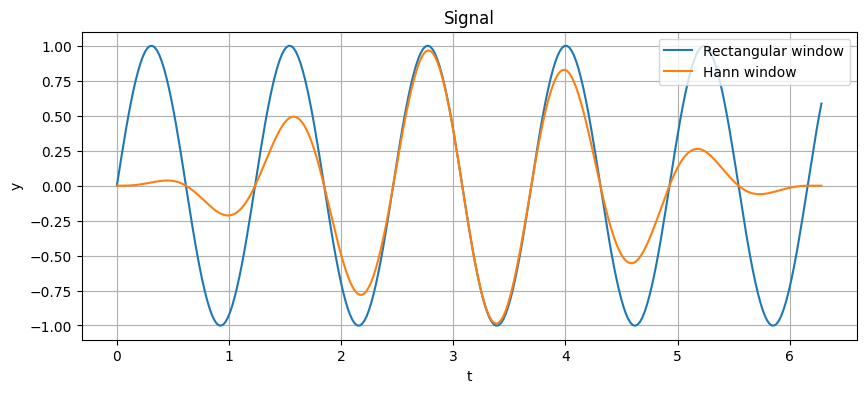

In [20]:
t = np.linspace(0, T, N)
x = f(t)
hanned = HannWindow(np.arange(N))*x

plt.figure(figsize=(10, 4))

plt.plot(t, x, label='Rectangular window')
plt.plot(t, hanned, label='Hann window')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Signal')
plt.legend()
plt.grid()
plt.show()

In [21]:
def DFT(x):
    M = len(x)
    m = np.arange(M)
    k = m.reshape((M, 1))
    e = np.exp(2j*np.pi*k*m/M)
    return np.dot(e, x)/M

In [22]:
dft_rect = DFT(x)
dft_Hann = DFT(hanned)

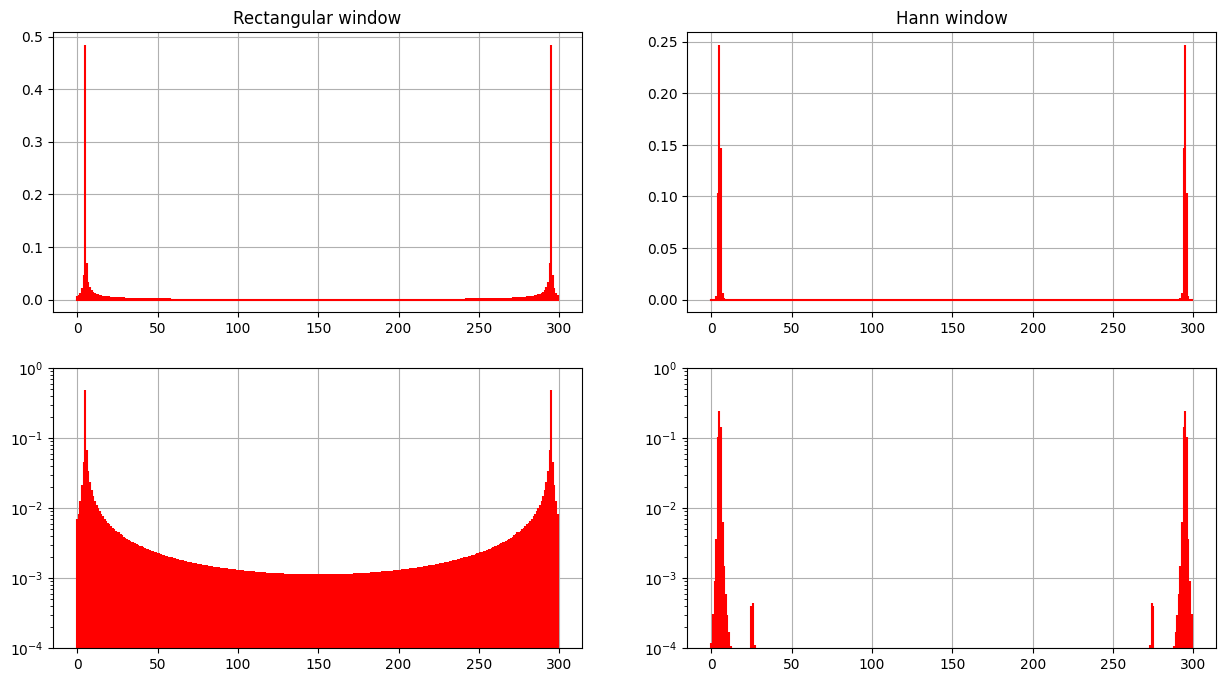

In [23]:
plt.figure(figsize=(15, 8))

rect = plt.subplot(221)

rect.stem(freq, abs(dft_rect), 'r', markerfmt=" ", basefmt="-r")
# rect.set_xlim([0, 50])
rect.grid()
rect.set_title('Rectangular window')

hann = plt.subplot(222)
hann.stem(freq, abs(dft_Hann), 'r', markerfmt=" ", basefmt="-r")
# hann.set_xlim([0, 50])
hann.grid()
hann.set_title('Hann window')

rect_log = plt.subplot(223)
rect_log.stem(freq, abs(dft_rect), 'r', markerfmt=" ", basefmt="-r")
# rect_log.set_xlim([0, 100])
rect_log.set_ylim([.0001, 1])
rect_log.set_yscale('log')
rect_log.grid()

hann_log = plt.subplot(224)
hann_log.stem(freq, abs(dft_Hann), 'r', markerfmt=" ", basefmt="-r")
# hann_log.set_xlim([0, 100])
hann_log.set_ylim([.0001, 1])
hann_log.set_yscale('log')
hann_log.grid()

plt.show()